
References: 
1. http://ipywidgets.readthedocs.io/en/latest/examples/Lorenz%20Differential%20Equations.html
2. https://github.com/mspieg/dynamical-systems/blob/master/LorenzEquations.ipynb
3. https://en.wikipedia.org/wiki/List_of_dynamical_systems_and_differential_equations_topics
4. http://ipython-books.github.io/chapter-12-deterministic-dynamical-systems/
http://ipython-books.github.io/
5. http://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/
6. http://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/
7. http://colah.github.io/posts/2015-08-Understanding-LSTMs/
8. http://www.iro.umontreal.ca/~lisa/pointeurs/RazvanPascanuThesis.pdf (also in downloads)
9. https://www.gribblelab.org/compneuro/2_Modelling_Dynamical_Systems.html#orgheadline5 
10. https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f
11. https://github.com/yuqirose/trnn poster - http://roseyu.com/Materials/nips17-tsw-poster.pdf
12. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/

In [2]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [3]:

import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

C:\Users\tgibbons\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Generate Time Series using the Lorenz System of DE

In [5]:

def solve_lorenz_graph(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')
    SEQUENCE_SIZE = 100         # length of the sequence to generate
    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
       # print(x, y, z) #print the data
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

In [6]:
def solve_lorenz(N=10, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):
    
    #define ODE function we need to solve
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose N random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    # First generate a list of time steps starting a zero and going to max_time. 250 steps for each time unit
    t = np.linspace(0, max_time, int(250*max_time))
    # Second integrate the ODE using the lorenz_deriv funtion above for each random starting point
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    return t, x_t

In [7]:
sigma=10.0
beta=8./3
rho=28.0
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    """Compute the time-derivative of a Lorenz system."""
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


In [27]:
print (t)

[0.         0.004004   0.00800801 0.01201201 0.01601602 0.02002002
 0.02402402 0.02802803 0.03203203 0.03603604 0.04004004 0.04404404
 0.04804805 0.05205205 0.05605606 0.06006006 0.06406406 0.06806807
 0.07207207 0.07607608 0.08008008 0.08408408 0.08808809 0.09209209
 0.0960961  0.1001001  0.1041041  0.10810811 0.11211211 0.11611612
 0.12012012 0.12412412 0.12812813 0.13213213 0.13613614 0.14014014
 0.14414414 0.14814815 0.15215215 0.15615616 0.16016016 0.16416416
 0.16816817 0.17217217 0.17617618 0.18018018 0.18418418 0.18818819
 0.19219219 0.1961962  0.2002002  0.2042042  0.20820821 0.21221221
 0.21621622 0.22022022 0.22422422 0.22822823 0.23223223 0.23623624
 0.24024024 0.24424424 0.24824825 0.25225225 0.25625626 0.26026026
 0.26426426 0.26826827 0.27227227 0.27627628 0.28028028 0.28428428
 0.28828829 0.29229229 0.2962963  0.3003003  0.3043043  0.30830831
 0.31231231 0.31631632 0.32032032 0.32432432 0.32832833 0.33233233
 0.33633634 0.34034034 0.34434434 0.34834835 0.35235235 0.3563

In [8]:
N=5
max_time = 4.0
#original code generated an array of starting points
x0 = -15 + 30 * np.random.random((N, 3))
print (x0)
# generate one random starting point at a time
point1 = np.random.random(3)
print ("Random point1 = ",point1)

sigma = 10.0
beta = 8.0/3
rho = 28.0

# Solve for the trajectories
# First generate a list of time steps starting a zero and going to max_time. 250 steps for each time unit
t = np.linspace(0, max_time, int(250*max_time))
print ("shape of t = ", t.shape)
#print (" t = " , t)

# Second integrate the ODE using the lorenz_deriv funtion above
#lor1 = integrate.odeint(lorenz_deriv, point1, t, sigma, beta, rho)
lor1 = integrate.odeint(lorenz_deriv, point1, t)
print (" lor1 = ", lor1)
print ("shape of lor1 = ", lor1.shape)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point2 = -15 + 30 * np.random.random(3)
lor2 = integrate.odeint(lorenz_deriv, point2, t)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point3 = -15 + 30 * np.random.random(3)
lor3 = integrate.odeint(lorenz_deriv, point3, t)

#x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
#                   for x0i in x0])

[[-8.00364412e-04 -1.25902675e+01 -9.51240547e+00]
 [-1.40666337e+01  1.66052247e-01 -1.35686652e+01]
 [-4.80173150e+00 -1.97859026e+00  2.02995847e+00]
 [-1.10640746e+01 -4.87058747e+00 -1.06735427e+01]
 [ 1.35432064e+01 -8.99341117e+00 -9.51352478e+00]]
Random point1 =  [0.19111691 0.27168472 0.81913288]
shape of t =  (1000,)
 lor1 =  [[ 0.19111691  0.27168472  0.81913288]
 [ 0.1946705   0.29154766  0.81064955]
 [ 0.19887087  0.31175916  0.80227637]
 ...
 [-8.19095827 -9.70701131 24.4465969 ]
 [-8.25198732 -9.78399446 24.50607217]
 [-8.31361376 -9.85949438 24.5698119 ]]
shape of lor1 =  (1000, 3)


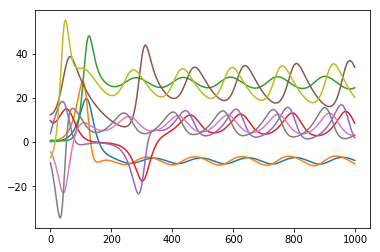

In [9]:
# from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(lor1)
plt.plot(lor2)
plt.plot(lor3)

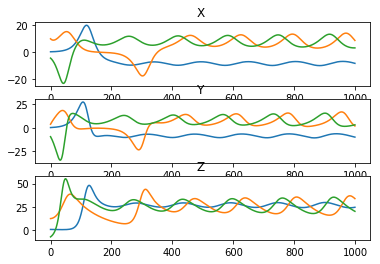

In [10]:

plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(lor1[:,0:1] )
plt.plot(lor2[:,0:1] )
plt.plot(lor3[:,0:1] )
#plt.show()

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(lor1[:,1:2] )
plt.plot(lor2[:,1:2] )
plt.plot(lor3[:,1:2] )
#plt.show()

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(lor1[:,2:3] )
plt.plot(lor2[:,2:3] )
plt.plot(lor3[:,2:3] )
plt.show()

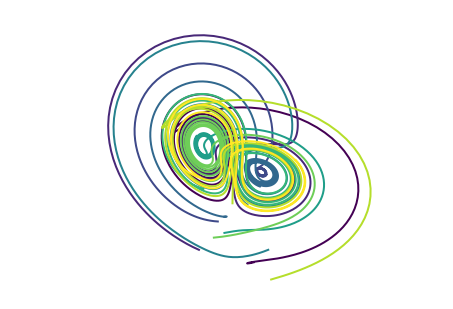

In [11]:
t, x_t = solve_lorenz_graph(angle=0, N=10) #angle initially at 0, butterfly at 134

In [12]:

widget = interactive(solve_lorenz_graph, angle=(0.,360.), max_time=(0.1, 10.0),
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(widget)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle', max=360.0), FloatSlider(value=4.0, description='max_time', max=10.0, min=0.1), FloatSlider(value=10.0, description='sigma', max=50.0), FloatSlider(value=2.6666666666666665, description='beta', max=8.0, min=-2.6666666666666665), FloatSlider(value=28.0, description='rho', max=50.0), Output()), _dom_classes=('widget-interact',))

In [13]:
#t, x_t = widget.result

In [14]:
t, x_t = solve_lorenz(N=10) #try 10 random starting point initially, chnage to 100 later

In [15]:
print ("lorenz output shape : " , x_t.shape)

lorenz output shape :  (10, 1000, 3)


In [16]:
print ("lorenz output : " , x_t)

lorenz output :  [[[-2.48933986e+00  6.60973480e+00 -1.49965688e+01]
  [-2.14077645e+00  6.18646806e+00 -1.48962127e+01]
  [-1.82130748e+00  5.82299967e+00 -1.47853208e+01]
  ...
  [ 6.87667416e+00  1.07734499e+01  1.78286316e+01]
  [ 7.03431517e+00  1.10115546e+01  1.79410297e+01]
  [ 7.19515729e+00  1.12517722e+01  1.80659207e+01]]

 [[-5.93002282e+00 -1.05973233e+01 -1.22298422e+01]
  [-6.13136261e+00 -1.15193465e+01 -1.18344052e+01]
  [-6.36138540e+00 -1.24619735e+01 -1.14104771e+01]
  ...
  [-1.11085203e+01 -1.62261151e+01  2.32341935e+01]
  [-1.13121656e+01 -1.63640151e+01  2.37150767e+01]
  [-1.15128567e+01 -1.64827701e+01  2.42098140e+01]]

 [[-9.41219366e+00 -4.63317819e+00 -3.09697577e+00]
  [-9.24717733e+00 -5.76936651e+00 -2.87083263e+00]
  [-9.13260659e+00 -6.87477643e+00 -2.60897637e+00]
  ...
  [ 8.94933599e+00  1.00204877e+01  2.61339939e+01]
  [ 8.99188828e+00  1.00458891e+01  2.62149083e+01]
  [ 9.03371359e+00  1.00685518e+01  2.62975123e+01]]

 ...

 [[ 1.40478473e+0

## Convert data into format for Keras

In [36]:
# split into train and test sets
train_size = int(len(x_t)* 0.70)
print(train_size)
test_size = len(x_t) - train_size
lorenz_train = x_t[0:train_size]
lorenz_test  = x_t[train_size:len(x_t)]
print ("train shape : " , lorenz_train.shape)
print ("test shape : " , lorenz_test.shape)

7
train shape :  (7, 1000, 3)
test shape :  (3, 1000, 3)


In [42]:

def to_sequences(seq_size, obs): 
    x = []
    y = []
    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [x for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
    return np.array(x),np.array(y)

In [43]:
def to_sequences_ray(seq_size, obs): 
    #x = []
    #y = []
    x, y = to_sequences(SEQUENCE_SIZE,obs[0])
    for i in range(len(obs)):
        xtemp, ytemp = to_sequences(SEQUENCE_SIZE,obs[i])
        x = np.concatenate((x, xtemp), axis=0)
        y = np.concatenate((y, ytemp), axis=0)
        #x.append(xtemp)
        #y.append(ytemp)
    return np.array(x),np.array(y)

In [44]:
data_segment = lorenz_train[1]
print("training data segment shape ", lorenz_train[0].shape)
print("training data segment ", lorenz_train[1])

training data segment shape  (1000, 3)
training data segment  [[ -5.93002282 -10.59732328 -12.22984216]
 [ -6.13136261 -11.51934646 -11.83440517]
 [ -6.3613854  -12.4619735  -11.41047706]
 ...
 [-11.10852032 -16.22611514  23.23419346]
 [-11.31216558 -16.36401507  23.71507674]
 [-11.51285672 -16.48277012  24.20981403]]


In [45]:

#train = np.apply_along_axis(to_sequences_ray, 1, lorenz_train)
print (lorenz_train.shape)
print (len(lorenz_train))

(7, 1000, 3)
7


In [46]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences_ray(SEQUENCE_SIZE,lorenz_train)
#print(lorenz_train)
x_test,y_test = to_sequences_ray(SEQUENCE_SIZE,lorenz_test)
print("Shape of training input: ", x_train.shape)
print("Shape of test input: ", x_test.shape)
print ("Shape of training output: " , y_train.shape)
print ("Shape of testing output: " , y_test.shape)

Shape of training input:  (7912, 10, 3)
Shape of test input:  (3956, 10, 3)
Shape of training output:  (7912, 3)
Shape of testing output:  (3956, 3)


In [47]:
print (x_train[1])

[[ -2.14077645   6.18646806 -14.8962127 ]
 [ -1.82130748   5.82299967 -14.78532082]
 [ -1.52754738   5.5141974  -14.66604305]
 [ -1.25643353   5.25549013 -14.5400914 ]
 [ -1.00519263   5.04282303 -14.40882193]
 [ -0.77130991   4.87261417 -14.27330094]
 [ -0.55250119   4.74171357 -14.1343581 ]
 [ -0.3466877    4.64736514 -13.99262854]
 [ -0.15197325   4.58717161 -13.84858652]
 [  0.03337642   4.55906245 -13.70257219]]


In [48]:
print (y_train[1])

[  0.21095219   4.56126473 -13.55481228]


## Build Neural Network model in Keras

In [49]:
print('Build model...')
model = Sequential()
model.add(LSTM(64, input_shape=(None, 3)))
model.add(Dense(32))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

Build model...
Train...


In [50]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=10)

Train on 7912 samples, validate on 3956 samples
Epoch 1/10
 - 2s - loss: 46.1923 - val_loss: 2.0810
Epoch 2/10
 - 1s - loss: 1.3473 - val_loss: 0.4800
Epoch 3/10
 - 1s - loss: 0.2899 - val_loss: 0.2287
Epoch 4/10
 - 1s - loss: 0.1022 - val_loss: 0.1442
Epoch 5/10
 - 1s - loss: 0.0632 - val_loss: 0.1021
Epoch 6/10
 - 1s - loss: 0.0514 - val_loss: 0.1259
Epoch 7/10
 - 1s - loss: 0.0294 - val_loss: 0.0938
Epoch 8/10
 - 1s - loss: 0.0229 - val_loss: 0.0912
Epoch 9/10
 - 1s - loss: 0.0300 - val_loss: 0.0980
Epoch 10/10
 - 1s - loss: 0.0179 - val_loss: 0.1272


## Plot original values and predictions

In [51]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

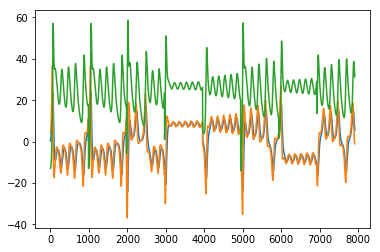

In [52]:
from matplotlib import pyplot as plt
# plot baseline and predictions
#plt.plot(x_train, linestyle=':')

plt.plot(trainPredict)
#list = np.arange(len(trainPredict)+10,len(trainPredict)+len(testPredict)+10)
#plt.plot(list,testPredict)

## Calculate difference between prediction and actual